In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def im_show(path):
    plt.figure(figsize=(12,4))
    plt.imshow(path)
    plt.show()

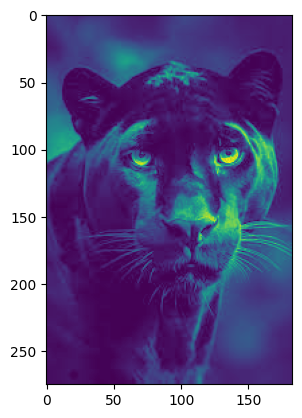

In [3]:
img = cv2.cvtColor(cv2.imread("pant.jpg"), cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [4]:
img = cv2.Sobel(img, cv2.CV_16S, 1, 1)

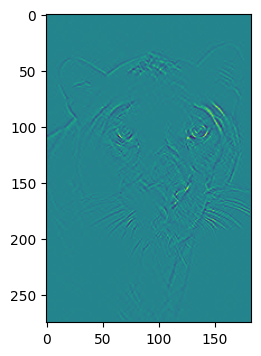

In [5]:
im_show(img)

In [6]:


def sobel(path):
    img = cv2.imread(path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    edges_x = cv2.filter2D(gray, -1, kernel_x)
    edges_y = cv2.filter2D(gray, -1, kernel_y)
    edges = edges_x + edges_y
    
    plt.figure(figsize=(12,4))
    plt.imshow(edges)
    plt.show()



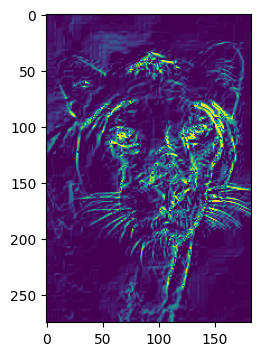

In [7]:
img2 = sobel("pant.jpg")

In [8]:
from skimage.feature import hog
from skimage import data, exposure

In [9]:
img = cv2.imread("pant.jpg")

In [10]:
np.shape(img)
print(type(img))

<class 'numpy.ndarray'>


In [11]:
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [12]:
type(hog_image)

In [28]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np
import keras 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.svm import SVC

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_train_hog = np.float32(np.zeros(np.shape(x_train)[:3]))
print(np.shape(x_train_hog))

(50000, 32, 32)


In [15]:
for i in range(np.shape(x_train)[0]):
    x_hog = np.array(x_train[i, :, :, :])
    fd, x_hog = hog(x_hog, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    x_train_hog[i, :, :] = x_hog

In [17]:
x_train_hog_rs = np.float32(np.zeros((50000, 1024)))

In [18]:
for i in range(np.shape(x_train_hog)[0]):
    x_train_hog_rs[i, :] = x_train_hog[i, :, :].reshape(1, -1)

In [19]:
clf_svm = SVC(gamma='auto')

In [20]:
clf_svm.fit(x_train_hog_rs, y_train.ravel())

SVC(gamma='auto')

In [21]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(gamma='auto')

In [24]:
x_test_hog = np.float32(np.zeros(np.shape(x_test)[:3]))

for i in range(np.shape(x_test)[0]):
    x_hog = np.array(x_test[i, :, :, :])
    fd, x_hog = hog(x_hog, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    x_test_hog[i, :, :] = x_hog
    
x_test_hog_rs = np.float32(np.zeros((10000, 1024)))

for i in range(np.shape(x_test_hog)[0]):
    x_test_hog_rs[i, :] = x_test_hog[i, :, :].reshape(1, -1)

In [25]:
predictions = clf_svm.predict(x_test_hog_rs)

In [40]:
svm_acc = accuracy_score(y_test.ravel(), predictions)
svm_prc = precision_score(y_test.ravel(), predictions, pos_label='positive', average='weighted')
svm_rec = recall_score(y_test.ravel(), predictions, pos_label='positive', average='weighted')
svm_f1 = f1_score(y_test.ravel(), predictions, pos_label='positive', average='weighted')
print("SVM Validation Accuracy: ", svm_acc)
print("SVM Validation Precision: ", svm_prc)
print("SVM Validation Recall: ", svm_rec)
print("SVM Validation F1: ", svm_f1)

SVM Validation Accuracy:  0.1594
SVM Validation Precision:  0.6097373878316221
SVM Validation Recall:  0.1594
SVM Validation F1:  0.12571732476785832


/home/sairon/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/home/sairon/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/home/sairon/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1521: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [62]:
img1 = np.int32(np.zeros(np.shape(x_train)[:3]))
np.shape(x_train[1, :, :, :])
img1 = cv2.imread("pant.jpg")
type(img1)

numpy.ndarray

(< cv2.KeyPoint 0x7f7ad7d5dc20>, < cv2.KeyPoint 0x7f7ad7d25080>, < cv2.KeyPoint 0x7f7ad7aa37b0>, < cv2.KeyPoint 0x7f7ad7aa1200>, < cv2.KeyPoint 0x7f7ad7aa26a0>, < cv2.KeyPoint 0x7f7ad7aa3180>, < cv2.KeyPoint 0x7f7ad7aa2430>, < cv2.KeyPoint 0x7f7ad7aa1260>, < cv2.KeyPoint 0x7f7ad7aa31b0>, < cv2.KeyPoint 0x7f7ad7aa1080>, < cv2.KeyPoint 0x7f7ad7bce550>, < cv2.KeyPoint 0x7f7ad7b3da40>, < cv2.KeyPoint 0x7f7ad7b3d980>, < cv2.KeyPoint 0x7f7ad7b3c5a0>, < cv2.KeyPoint 0x7f7ad7b3cea0>, < cv2.KeyPoint 0x7f7ad7b3db90>, < cv2.KeyPoint 0x7f7ad7b3d380>, < cv2.KeyPoint 0x7f7ad7b3dc80>)


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'drawKeypoints'
> Overload resolution failed:
>  - Layout of the output array outImage is incompatible with cv::Mat
>  - Expected Ptr<cv::UMat> for argument 'outImage'


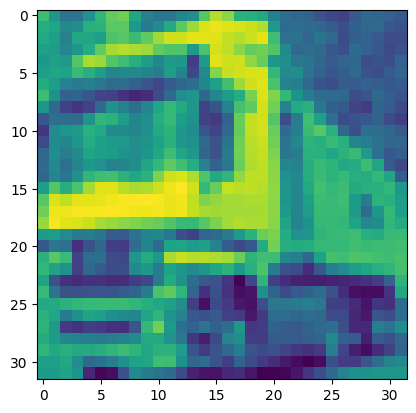

In [76]:
img1 = x_train[1, :, :, :]
gray= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
sift = cv2.SIFT_create()
kp, dp = sift.detectAndCompute(img1,None)
print(kp)
img1=cv2.drawKeypoints(gray,kp,img1)
plt.imshow(img1)

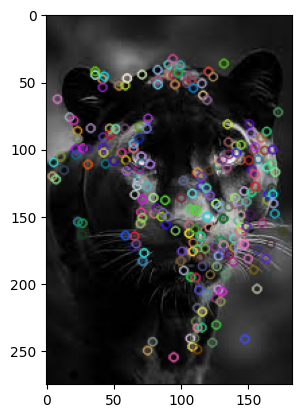

In [78]:
img1 = cv2.imread("pant.jpg")
gray= cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp, dp = sift.detectAndCompute(img1,None)
img1=cv2.drawKeypoints(gray,kp,img1)
plt.imshow(img1)

In [ ]:
for i in range(np.shape(x_train)[0]):
    x_hog = np.array(x_train[i, :, :, :])
    fd, x_hog = hog(x_hog, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    x_train_hog[i, :, :] = x_hog